# Calcul des probabilités par énumération exhaustive

## 1 Rappels de vocabulaire

(à faire)

## 2 Introduction

(à faire)

In [1]:
# Exemple d'issue
des = (2,6)

In [3]:
issues = []
for d1 in range(1,7):
    for d2 in range(1,7):
        issues.append((d1,d2))
print(issues)

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]


In [4]:
issues = [(d1,d2) for d1 in range(1,7) for d2 in range(1,7)]
print(issues)

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]


In [5]:
import itertools
issues = list(itertools.product([1,2,3,4,5,6],repeat = 2))
print(issues)

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]


In [6]:
print(len(issues))

36


In [8]:
nb_iss_fav = 0
for issue in issues :
    if issue[0] == issue[1] or abs(issue[0]-issue[1]) == 1 :
        nb_iss_fav += 1

In [9]:
print(nb_iss_fav)

16


In [10]:
proba = nb_iss_fav / len(issues)
print(proba)

0.4444444444444444


## 3 Exercices pratiques

### 3.1 4-21

In [25]:
def proba_suite() -> float:
    issues = list(itertools.product([1,2,3,4,5,6],repeat = 3))
    nb_iss_fav = 0
    for issue in issues :
        sort_issue = sorted(issue)
        if (sort_issue[0] == (sort_issue[1]-1)) and (sort_issue[2] == (sort_issue[1]+1)):
            nb_iss_fav += 1
    return nb_iss_fav / len(issues)

In [26]:
print(proba_suite())

0.1111111111111111


In [37]:
def proba_fiches() -> float:
    issues = list(itertools.product([1,2,3,4,5,6],repeat = 3))
    nb_iss_fav = 0
    for issue in issues :
        if issue.count(1) >= 2:
            nb_iss_fav += 1
    return nb_iss_fav / len(issues)

In [38]:
print(proba_fiches())

0.07407407407407407


### 3.2 Ouverture au 5000

In [44]:
def proba_ouverture_5k(mini: int) -> float:
    issues = list(itertools.product([1,2,3,4,5,6],repeat = 5))
    nb_iss_fav = 0
    for issue in issues :
        points = 0
        for i in range(len(issue)):
            if issue[i] == 1:
                points += 100
            elif issue[i] == 5:
                points += 50
        if points >= mini:
            nb_iss_fav += 1
    return nb_iss_fav / len(issues)

In [45]:
print(proba_ouverture_5k(350))
print(proba_ouverture_5k(250))

0.016203703703703703
0.125


### 3.3 Chapeaux dérangés

In [70]:
def chapeaux(n: int) -> float:
    issues = list(itertools.permutations([i for i in range(0,n)], n))
    nb_iss_fav = 0
    for issue in issues :
        k = 0
        for i in range(len(issue)):
            if issue[i] == i:
                k += 1
        if k == 0:
            nb_iss_fav += 1
    return nb_iss_fav / len(issues)

In [71]:
print(chapeaux(2))
print(chapeaux(3))
print(chapeaux(4))
print(chapeaux(5))
print(chapeaux(6))

0.5
0.3333333333333333
0.375
0.36666666666666664
0.3680555555555556


[0.5, 0.3333333333333333, 0.375, 0.36666666666666664, 0.3680555555555556, 0.3678571428571429, 0.36788194444444444, 0.36787918871252206]


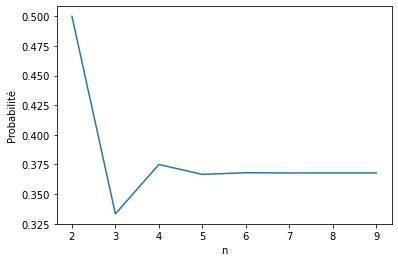

In [72]:
import matplotlib
import matplotlib.pyplot as plt
abscisses = range(2,10)
ordonnees = [chapeaux(x) for x in abscisses]
print(ordonnees)
plt.figure()
plt.plot(abscisses,ordonnees)
plt.xlabel("n")
plt.ylabel("Probabilité")
plt.show()

## 4 Digressions (bonus)

### 4.1 Dérangement

(à faire)

### 4.2 Générateurs

In [74]:
import time, sys
l1 = itertools.permutations([0,1,2,3,4,5,6,7,8,9])
l2 = list(itertools.permutations([0,1,2,3,4,5,6,7,8,9]))
print(sys.getsizeof(l1))
print(sys.getsizeof(l2))
def fun1():
    l1 = itertools.permutations([0,1,2,3,4,5,6,7,8,9])
    for i in l1 :
        None
def fun2():
    l2 = list(itertools.permutations([0,1,2,3,3,4,5,6,7,8,9]))
    for i in l2:
        None
start_time = time.time()
fun1()
print(time.time()-start_time)
start_time = time.time()
fun2()
print(time.time()-start_time)

240
30140776
0.15681195259094238
7.921920537948608


In [75]:
l1 = [(d1,d2,d3) for d1 in range(6) for d2 in range(6) for d3 in range(6)]
l2 = ((d1,d2,d3) for d1 in range(6) for d2 in range(6) for d3 in range(6))
print(sys.getsizeof(l1))
print(sys.getsizeof(l2))

1920
112


### 4.3 Pour aller plus loin : généralisation

In [84]:
def proba(gE, tA) -> float:
    nb_iss_fav = 0
    for issue in gE:
        if tA(issue):
            nb_iss_fav += 1
    return nb_iss_fav / len(issues)

In [85]:
# Probabilité d'avoir un double en lançant deux dés
p = proba(gE = itertools.product([1, 2, 3, 4, 5, 6],[1, 2, 3, 4, 5, 6]),
          tA = lambda x: x[0] == x[1])
print(p)

0.16666666666666666
